# Ejercicio 1

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import glob
import os

plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('seaborn')

In [2]:
dir_actual = os.getcwd()
archivos_dump = list(map(lambda x: f'{dir_actual}\{x}', glob.glob('Apoyo Desafío - Naive Bayes/dump/*.csv')))

dfs = (pd.read_csv(f) for f in archivos_dump)
df = pd.concat(dfs).drop(columns='Unnamed: 0')
df.columns = ['artist', 'genre', 'song_name', 'lyrics']

# Ejercicio 2

<AxesSubplot:xlabel='artist'>

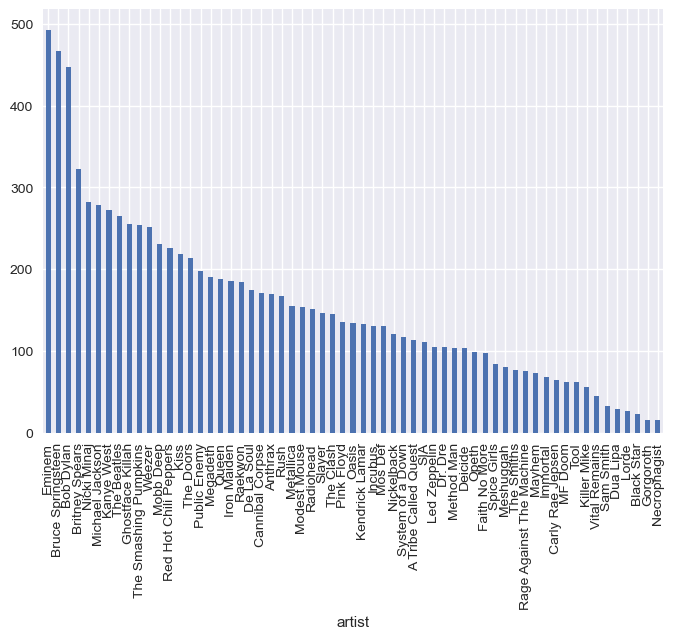

In [3]:
cantidad_canciones_por_artista = df.groupby('artist')['song_name'].count().sort_values(ascending=False)
cantidad_canciones_por_artista.plot(kind='bar')

- Eminem, Bruce Springsteen, Bob Dylan, Britney Spears, Nicki Minaj y Michael Jackson son los artistas con la mayor cantidad de canciones (~460 canciones en promedio).

- Sam Smith, Dua Lipa, Lorde, Black Star, Gorgoroth y Necrophagist son los artistas con la menor cantidad de canciones (~16 canciones en promedio).

<AxesSubplot:xlabel='genre'>

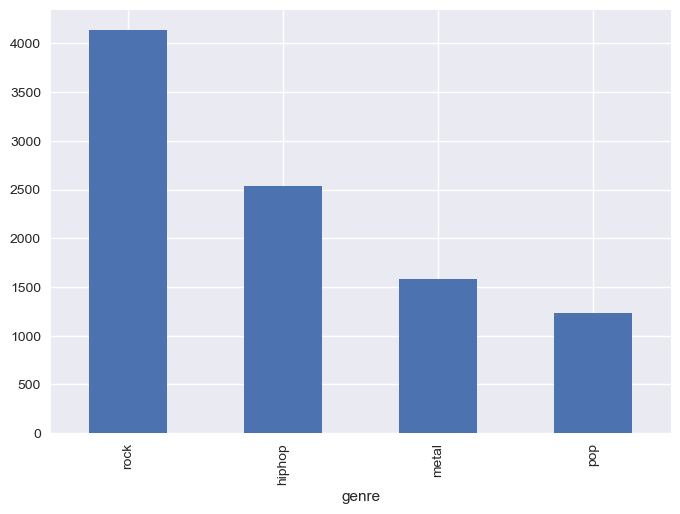

In [4]:
cantidad_canciones_por_genero = df.groupby('genre')['song_name'].count().sort_values(ascending=False)
cantidad_canciones_por_genero.plot(kind='bar')

- El genero rock es el que tiene la mayor cantidad de canciones distintas, con aproximadamente 4100 canciones.

- El genero pop es el que tiene la menor cantidad de canciones distintas, con aproximadamente 1300 canciones

# Ejercicio 3

CountVectorizer es una clase que convierte una coleccion de textos a un matriz de conteo para cada token (o pedazo de texto). Por lo tanto, permite ver la frecuencia de ciertas palabras en un texto completo.

El input que recibe es una lista de archivos, strings o bytes que contenga los textos a analizar. En nuestro caso, los textos estan contenidos en la columna ```lyrics``` de nuestro dataframe.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer_fit = count_vectorizer.fit_transform(df['lyrics'])
words = count_vectorizer.get_feature_names_out()
words_freq = count_vectorizer_fit.toarray().sum(axis=0)

In [6]:
df_conteo_palabras = pd.DataFrame(words_freq, index=words)
df_conteo_palabras.columns = ['Conteo']
df_conteo_palabras = df_conteo_palabras.sort_values('Conteo', ascending=False)

In [7]:
top_100 = df_conteo_palabras.head(100)

In [8]:
def obtener_conteo_palabras(serie_palabras):
    count_vectorizer = CountVectorizer(stop_words='english')
    count_vectorizer_fit = count_vectorizer.fit_transform(serie_palabras)
    words = count_vectorizer.get_feature_names_out()
    words_freq = count_vectorizer_fit.toarray().sum(axis=0)

    conteo_palabras = pd.DataFrame(words_freq, index=words, columns=['Conteo'])
    conteo_palabras = conteo_palabras.sort_values('Conteo', ascending=False)
    top_100 = conteo_palabras.head(100)
    
    return top_100

def analizar_palabras_de_generos(df):
    tmp = df.copy()

    for genero in tmp['genre'].unique():
        df_genero = tmp.query('genre == @genero')
        top_100_genero = obtener_conteo_palabras(df_genero['lyrics'])
        top_100_genero.head(20).plot(kind='bar')
        plt.title(f'Genero: {genero}')
        plt.tight_layout()

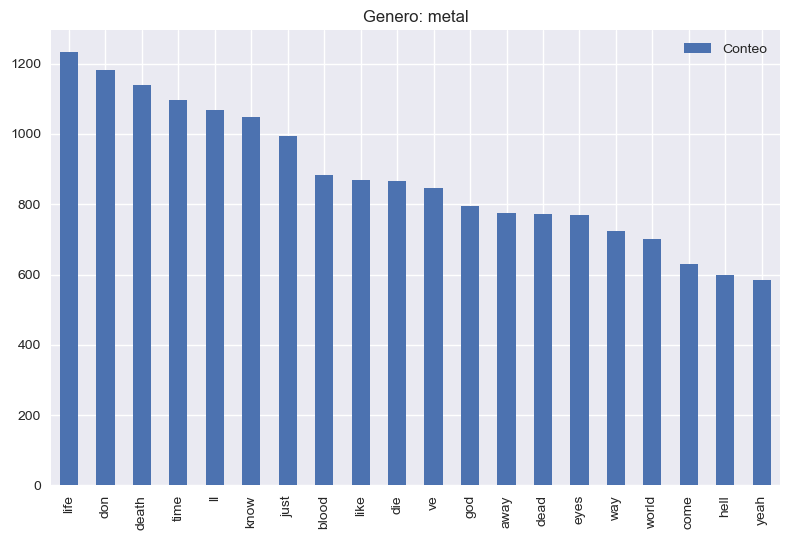

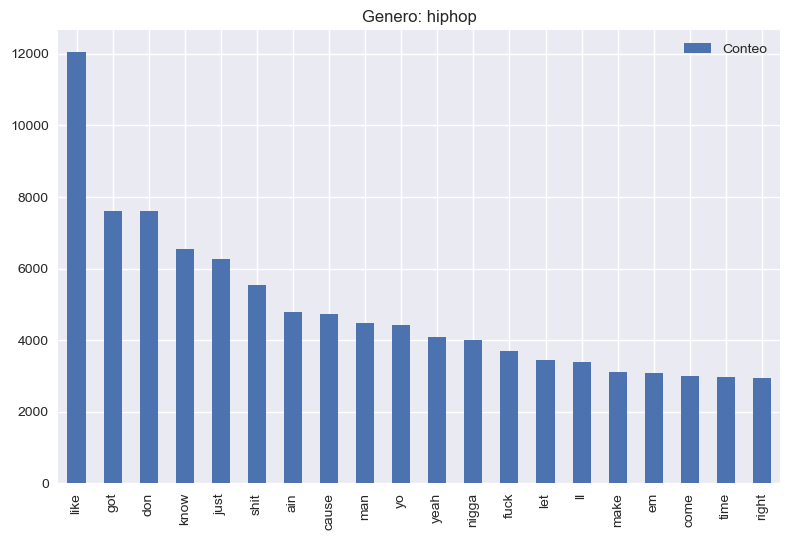

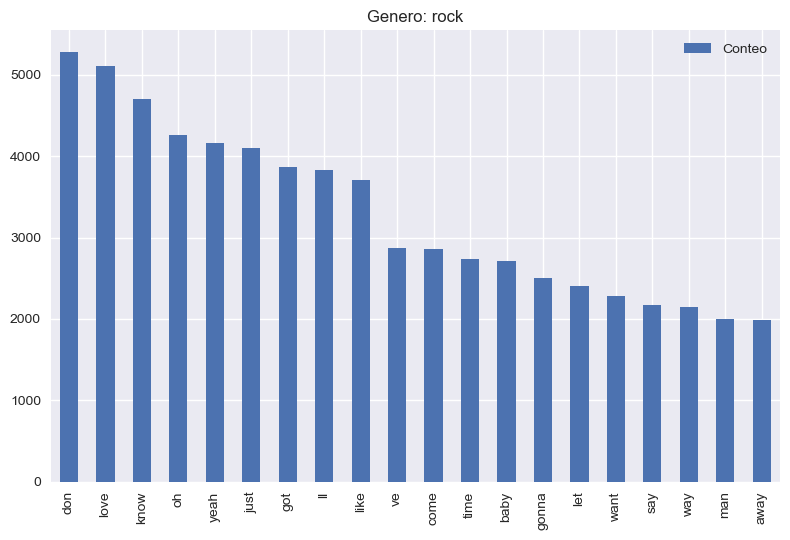

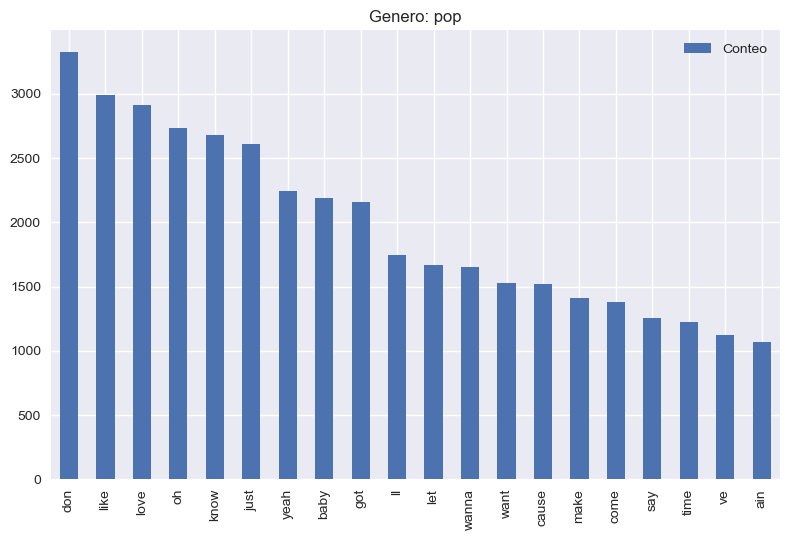

In [9]:
analizar_palabras_de_generos(df)

# Ejercicio 4

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
pipeline_model = Pipeline([('vectorize', CountVectorizer()),
                          ('model', MultinomialNB())])

X = df['lyrics']
y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
pipeline_model.fit(X_train, y_train)

Pipeline(steps=[('vectorize', CountVectorizer()), ('model', MultinomialNB())])

In [16]:
yhat = pipeline_model.predict(X_test)

In [20]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

      hiphop       0.86      0.90      0.88      1042
       metal       0.85      0.69      0.76       644
         pop       0.67      0.46      0.54       497
        rock       0.76      0.86      0.81      1613

    accuracy                           0.79      3796
   macro avg       0.78      0.73      0.75      3796
weighted avg       0.79      0.79      0.79      3796



El modelo presenta una exactitud del 79%. Ademas, se puede ver que el genero mejor clasificado es el hiphop (mayor f1), y el peor clasificado es el pop (menor f1).